In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

In [243]:
ds_path = '/Users/jfrank/dl-journey/sharpestminds-proj/datasets/'
data_2013 = pd.read_csv(ds_path + '2013.csv')
data_2014 = pd.read_csv(ds_path + '2014.csv')
data_2015 = pd.read_csv(ds_path + '2015.csv')
data_2016 = pd.read_csv(ds_path + '2016.csv')
data_2017 = pd.read_csv(ds_path + '2017.csv')
data_2018 = pd.read_csv(ds_path + '2018.csv')

In [217]:
def fix_columns(df1, df2):
    for name1, name2 in zip(df1['NAME'], df2['NAME']):
        if name1 == name2:
            df2['LATITUDE'] = df1['LATITUDE']
            df2['LONGITUDE'] = df1['LONGITUDE']
    return df2 

data_2014 = fix_columns(data_2013, data_2014)

In [218]:
col_list = ['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'TAVG', 'TMAX', 'TMIN']
data_2013 = data_2013[col_list]
data_2014 = data_2014[col_list]
data_2015 = data_2015[col_list]
data_2016 = data_2016[col_list]
data_2017 = data_2017[col_list]
data_2018 = data_2018[col_list]

In [241]:
df_list = [data_2013, data_2014, data_2015, data_2016, data_2017, data_2018]
df_six_yrs = pd.concat(df_list)
df_six_yrs = df_six_yrs.fillna(0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [242]:
map_to_values = {place:i for i, place in enumerate(df_six_yrs['NAME'].unique())}
df_six_yrs['LOCATION'] = df_six_yrs['NAME'].map(map_to_values)
map_to_values

{'NY CITY CENTRAL PARK, NY US': 0,
 'JFK INTERNATIONAL AIRPORT, NY US': 1,
 'BROOKLYN 3.1 NW, NY US': 2,
 'NEW YORK 8.8 N, NY US': 3}

In [235]:
df_six_yrs['TAVG'] = (df_six_yrs['TMAX'] + df_six_yrs['TMIN'])/2
df_six_yrs_x = df_six_yrs['TAVG'].values.reshape(-1, 1)
df_target_y = df_six_yrs['LOCATION'].values.reshape(-1, 1)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(df_six_yrs_x, df_target_y, test_size=0.25, random_state=0)

In [237]:
log_reg = LogisticRegression()
label_enc = preprocessing.LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.fit_transform(y_test)
model = log_reg.fit(X_train, y_train_encoded)
predictions = log_reg.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [238]:
accuracy_score = log_reg.score(X_test, y_test_encoded)

In [239]:
conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions)

Text(0.5, 1.0, 'Accuracy Score: 0.6014598540145986')

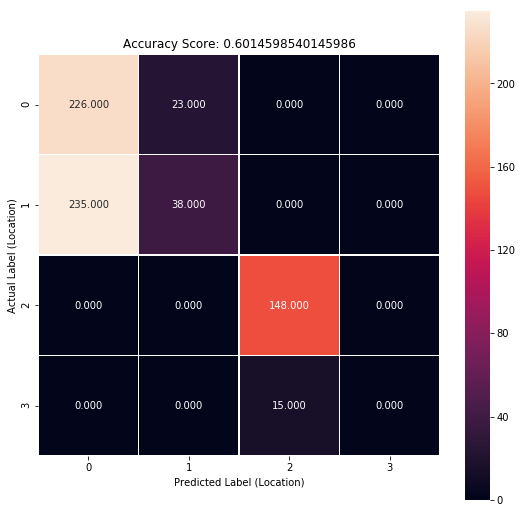

In [244]:
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt='.3f', linewidths=.5, square=True)
plt.ylabel('Actual Label (Location)')
plt.xlabel('Predicted Label (Location)')
title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(title, size=12)